[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

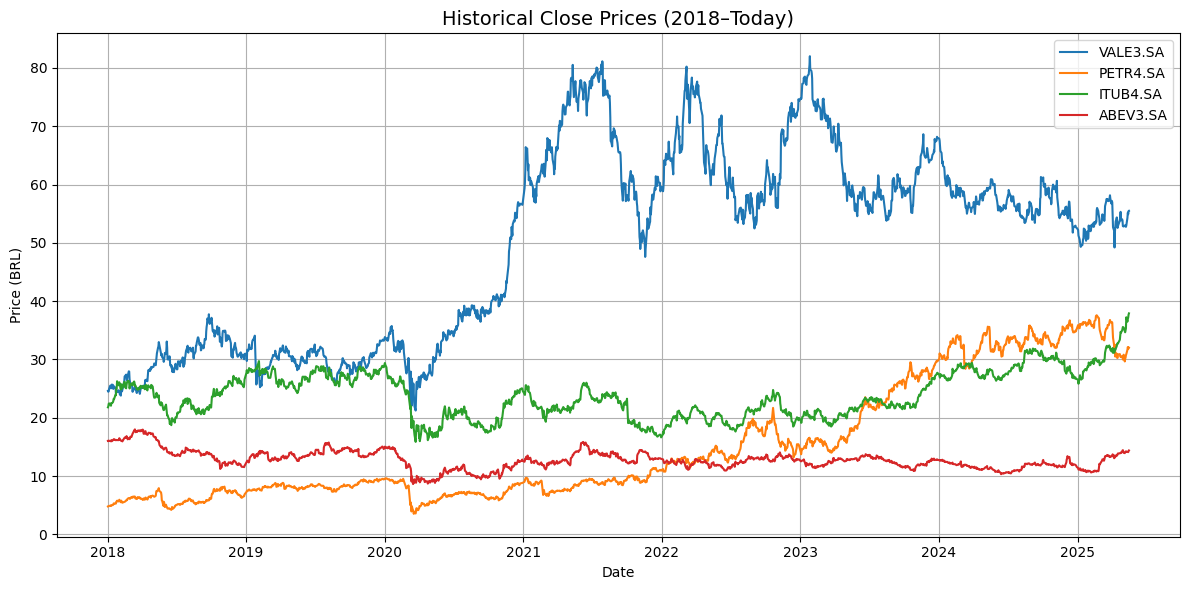

In [ ]:
# 01_stock_data_download.ipynb
# Author: André Lopes Marinho
# Description:
# Clean download of historical prices from Yahoo Finance, clean CSV output

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Step 1: Config
tickers = ['VALE3.SA', 'PETR4.SA', 'ITUB4.SA', 'ABEV3.SA']
start_date = '2018-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')

# Step 2: Download prices one by one and build clean DataFrame
price_data = pd.DataFrame()

for ticker in tickers:
    print(f"Downloading {ticker}...")
    df = yf.download(ticker, start=start_date, end=end_date)
    if 'Close' not in df.columns:
        print(f"No 'Close' column for {ticker}, skipping.")
        continue
    df = df[['Close']].copy()
    df.columns = [ticker]
    price_data = df if price_data.empty else price_data.join(df, how='outer')

# Step 3: Force index and column names to be clean
price_data.index.name = 'Date'
price_data.columns.name = None

# Step 4: Save to CSV cleanly
price_data.to_csv('../data/stock_prices_brazil.csv', index=True)

# Step 5: Plot to validate
# This gives a visual sense of how each stock has performed over time
plt.figure(figsize=(12, 6))
for ticker in price_data.columns:
    plt.plot(price_data[ticker], label=str(ticker))
plt.title('Historical Close Prices (2018–Today)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Price (BRL)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
